# NAME: OGUNLEYE SUNDAY SOLOMON
## DATA ANALYST
# WORLD CUP ANALYSIS CHALLENGE

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [141]:
data= pd.read_excel('world_cup.xlsx')

In [143]:
data = data.drop_duplicates()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 11 columns):
Year           836 non-null int64
Date           836 non-null datetime64[ns]
Time           836 non-null object
Round          836 non-null object
Stadium        836 non-null object
City           836 non-null object
HomeTeam       836 non-null object
HomeGoals      836 non-null int64
AwayGoals      836 non-null int64
AwayTeam       836 non-null object
Observation    57 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 78.4+ KB


In [144]:
data['totalgoals'] = data['HomeGoals']+data['AwayGoals']

In [142]:
 data.shape

(852, 11)

In [145]:
#get a day of the week and month columns
data['month'] = pd.to_datetime(data['Date']).dt.month_name()
data['day'] = pd.to_datetime(data['Date']).dt.day_name()

In [146]:
data.head(2)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,totalgoals,month,day
0,1930,1930-07-13,15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,NaN,5,July,Sunday
1,1930,1930-07-13,15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,NaN,3,July,Sunday


In [147]:
data = data[['Year', 'month', 'day', 'Time', 'Round', 'HomeTeam', 'HomeGoals', 'AwayTeam', 'AwayGoals', 'totalgoals']]

In [148]:
data.head(3
         )

,Year,month,day,Time,Round,HomeTeam,HomeGoals,AwayTeam,AwayGoals,totalgoals
0,1930,July,Sunday,15:00:00,Group 1,France,4,Mexico,1,5
1,1930,July,Sunday,15:00:00,Group 4,USA,3,Belgium,0,3
2,1930,July,Monday,12:45:00,Group 2,Yugoslavia,2,Brazil,1,3


In [149]:
matches_per_year = data.Year.value_counts() #a series to hold our values
all_games = pd.DataFrame(matches_per_year) #make series into a dataframe
all_games.reset_index(inplace=True) #reset it's index inplace
all_games.columns = ['Year', 'Matches'] #rename the columns as needed

In [150]:
all_games

,Year,Matches
0,2014,64
1,2010,64
2,2006,64
3,2002,64
4,1998,64
5,1994,52
6,1990,52
7,1986,52
8,1982,52
9,1974,38


Text(0.5, 1.0, 'NUMBER OF MATCHES PLAYED FROM 1930')

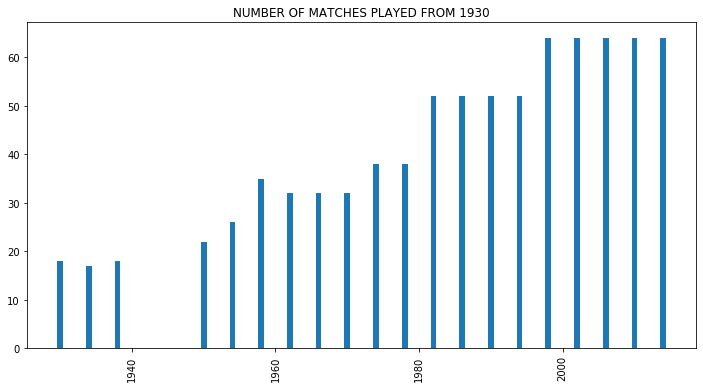

In [151]:
plt.figure(figsize=(12,6))
plt.bar(x=all_games['Year'], height = all_games['Matches'])
plt.xticks(rotation=90)
plt.title('NUMBER OF MATCHES PLAYED FROM 1930')

In [152]:
totalgoals_per_year = data.groupby(['Year']).totalgoals.sum()
all_goals = pd.DataFrame(totalgoals_per_year)
all_goals.reset_index(inplace=True)
all_goals.columns = ['Years', 'TotalGoals']

In [153]:
all_goals

,Years,TotalGoals
0,1930,70
1,1934,70
2,1938,84
3,1950,88
4,1954,140
5,1958,126
6,1962,89
7,1966,89
8,1970,95
9,1974,97


Text(0.5, 1.0, 'TOTAL GOALS PER YEAR')

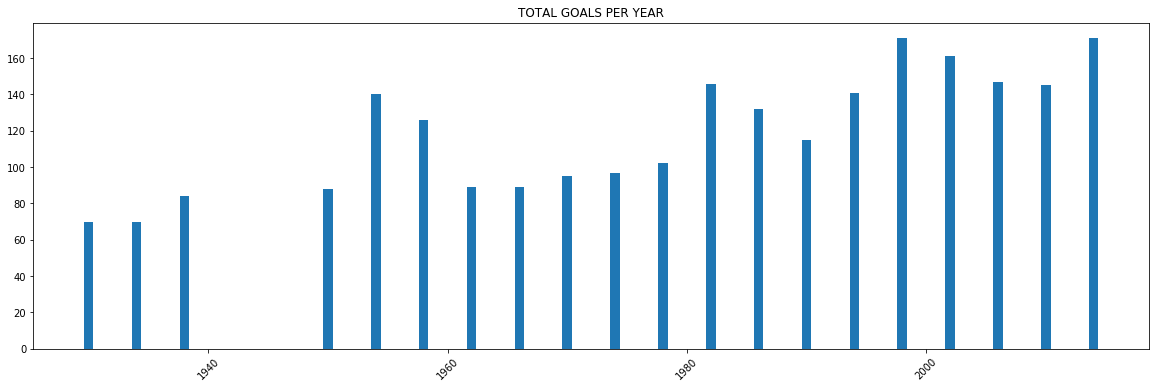

In [154]:
plt.figure(figsize=(20,6))
plt.bar(x=all_goals['Years'],height = all_goals['TotalGoals'])
plt.xticks(rotation=45)
plt.title('TOTAL GOALS PER YEAR')

In [155]:
final_round=data[data['Round']=='Final']

In [156]:
final_round.head()

,Year,month,day,Time,Round,HomeTeam,HomeGoals,AwayTeam,AwayGoals,totalgoals
17,1930,July,Wednesday,14:15:00,Final,Uruguay,4,Argentina,2,6
34,1934,June,Sunday,17:30:00,Final,Italy,2,Czechoslovakia,1,3
52,1938,June,Sunday,17:00:00,Final,Italy,4,Hungary,2,6
100,1954,July,Sunday,17:00:00,Final,Germany FR,3,Hungary,2,5
135,1958,June,Sunday,15:00:00,Final,Brazil,5,Sweden,2,7


In [157]:
final_team=[line for line in final_round.HomeTeam] + [line for line in final_round.AwayTeam]
final_team_df = pd.DataFrame(columns=['Teams'], data = final_team)
final_team_df.Teams.value_counts()

Germany FR        6
Italy             6
Brazil            6
Argentina         5
Netherlands       3
Germany           2
Hungary           2
Czechoslovakia    2
France            2
Uruguay           1
Sweden            1
England           1
Spain             1
Name: Teams, dtype: int64

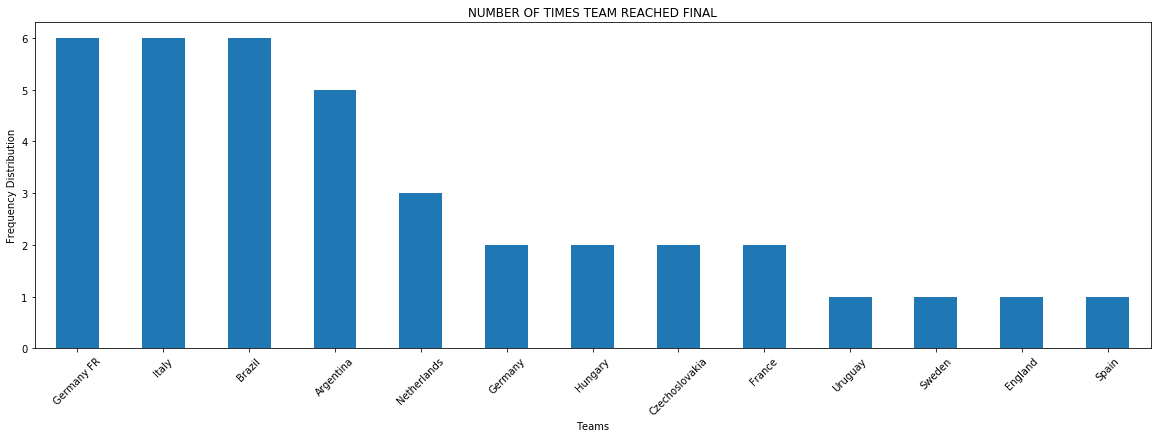

In [158]:
plt.figure(figsize=(20,6))
final_team_df['Teams'].value_counts().plot(kind='bar')
plt.xlabel("Teams")
plt.ylabel("Frequency Distribution")
plt.xticks(rotation = 45)
plt.title('NUMBER OF TIMES TEAM REACHED FINAL')
plt.show()

In [159]:
semi_finals = data[data['Round'] == 'Semi-finals']
semi_finals.head()

,Year,month,day,Time,Round,HomeTeam,HomeGoals,AwayTeam,AwayGoals,totalgoals
15,1930,July,Saturday,14:45:00,Semi-finals,Argentina,6,USA,1,7
16,1930,July,Sunday,14:45:00,Semi-finals,Uruguay,6,Yugoslavia,1,7
31,1934,June,Sunday,16:30:00,Semi-finals,Italy,1,Austria,0,1
32,1934,June,Sunday,16:30:00,Semi-finals,Czechoslovakia,3,Germany,1,4
49,1938,June,Thursday,18:00:00,Semi-finals,Hungary,5,Sweden,1,6


In [160]:
semi_finals_team=[line for line in semi_finals.HomeTeam] + [line for line in semi_finals.AwayTeam]
semi_finals_team_df = pd.DataFrame(columns=['SemifinalTeams'], data = semi_finals_team)
semi_finals_team_df.SemifinalTeams.value_counts()

Brazil            8
Italy             7
Germany FR        7
Germany           5
France            5
Uruguay           4
Argentina         4
Sweden            3
Netherlands       3
Hungary           2
Czechoslovakia    2
England           2
Yugoslavia        2
Portugal          2
Austria           2
Poland            1
Bulgaria          1
Turkey            1
Croatia           1
Belgium           1
Soviet Union      1
Korea Republic    1
USA               1
Chile             1
Spain             1
Name: SemifinalTeams, dtype: int64

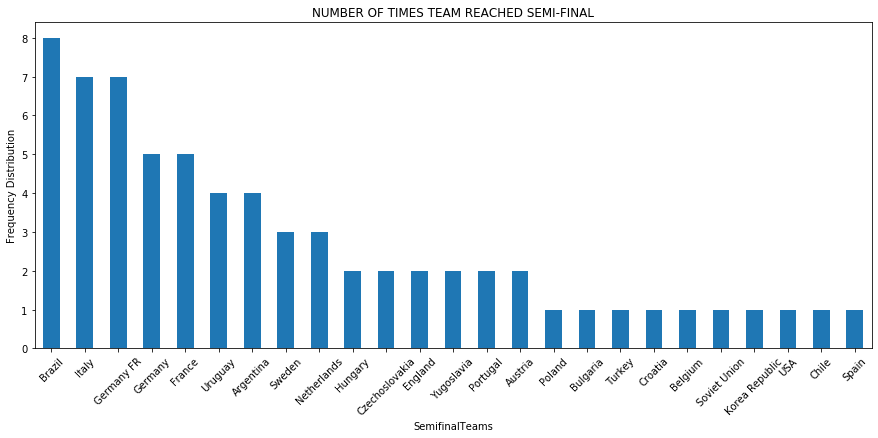

In [161]:
plt.figure(figsize=(15,6))
semi_finals_team_df['SemifinalTeams'].value_counts().plot(kind='bar')
plt.xlabel("SemifinalTeams")
plt.ylabel("Frequency Distribution")
plt.xticks(rotation = 45)
plt.title('NUMBER OF TIMES TEAM REACHED SEMI-FINAL')
plt.show()

In [162]:
semi_final_goals=semi_finals.totalgoals.sum()
f"The totals goals scored in a semi final from 1930 to 2014 was {semi_final_goals}."

'The totals goals scored in a semi final from 1930 to 2014 was 123.'

In [163]:
average_semi_final_goals=semi_finals.totalgoals.mean()
f"An average of {average_semi_final_goals:.2f} was score in every match from 1930 - 2014."

'An average of 3.62 was score in every match from 1930 - 2014.'

In [164]:
quarter_finals = data[data['Round'] == 'Quarter-finals']
quarter_finals.head()

,Year,month,day,Time,Round,HomeTeam,HomeGoals,AwayTeam,AwayGoals,totalgoals
26,1934,May,Thursday,16:30:00,Quarter-finals,Czechoslovakia,3,Switzerland,2,5
27,1934,May,Thursday,16:30:00,Quarter-finals,Germany,2,Sweden,1,3
28,1934,May,Thursday,16:30:00,Quarter-finals,Italy,1,Spain,1,2
29,1934,May,Thursday,16:30:00,Quarter-finals,Austria,2,Hungary,1,3
30,1934,June,Friday,16:30:00,Quarter-finals,Italy,1,Spain,0,1


In [165]:
quarter_finals_goal=quarter_finals.totalgoals.sum()
f"The total goals scored in a quarter final from 1930 - 2014 was {quarter_finals_goal}"

'The total goals scored in a quarter final from 1930 - 2014 was 175'

In [166]:
quarter_finals_goal=quarter_finals.totalgoals.mean()
f"An average goal of {quarter_finals_goal:.2f} was score in every match from 1930 - 2014."

'An average goal of 2.82 was score in every match from 1930 - 2014.'

In [176]:
finals_goals=final_round.totalgoals.sum()
f"The total goals scored in a final from 1930 - 2014 was {finals_goals}"

'The total goals scored in a final from 1930 - 2014 was 68'

In [177]:
finals_goals=final_round.totalgoals.mean()
f"An average goal of {finals_goals:.2f} was score in every match from 1930 - 2014."

'An average goal of 3.58 was score in every match from 1930 - 2014.'

In [181]:
final_less=data[data['Round']!='Finals']

In [182]:
semi_less=final_less[final_less['Round']!='Semi-finals']

In [183]:
quarter_less=semi_less[semi_less['Round']!='Quarter-finals']

In [186]:
game_less_quarter=quarter_less.shape[0]

In [187]:
f"The number of total game played aside quarter final and above was {game_less_quarter}"

'The number of total game played aside quarter final and above was 740'